In [1]:
import pickle
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import os
import itertools
from sklearn.dummy import DummyClassifier


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
%matplotlib inline
plt.style.use('seaborn')

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))


In [5]:
true_df.head()

,body,num_source,source,title
0,The following statements were posted to the ve...,2.0,Reuters,"Trump on Twitter (June 6): Mitch McConnell, Jo..."
1,"TEL AVIV (Reuters) - Donald Trump’s attorney, ...",2.0,Reuters,Giuliani says Mueller's investigators trying t...
2,WASHINGTON (Reuters) - U.S. House of Represent...,2.0,Reuters,House Speaker doubtful of NAFTA passage in cur...
3,BRUSSELS (Reuters) - U.S. Defense Secretary Ji...,2.0,Reuters,"In Europe, Mattis is in familiar spot: calming..."
4,"WASHINGTON/MORRISTOWN, N.J. (Reuters) - A lawy...",2.0,Reuters,Lawyer to ex-Trump campaign aide Manafort taps...


In [6]:
stemmer = porter.PorterStemmer()
stopwords = stopwords.words()

In [7]:
def clean_text(text):
    '''Removes stop words and changes word to stem words'''
    cleaned_text = []
    for post in text:
        cleaned_words = []
        for word in post.split():
            low_word = word.lower()
            if low_word not in stopwords:
                cleaned_words.append(low_word)
        cleaned_text.append(' '.join(cleaned_words))
        print(round((len(cleaned_text) / 4092) * 100, 2), "%")
    return cleaned_text

In [8]:
def drop_nouns(text_list):
    no_nouns = []
    cleaned_text = []
    phrases = []
    for x in text_list:
        words = pos_tag(word_tokenize(x))
        #werdz2 = (['CC','CD','DT','EX','FW','IN','LS','MD','PDT','POS','PRP','PRP$',
                   #'RP','TO','UH','WDT','WP','WP$','WRB', 'NNP', 'NNPS', 'NN', 'NNS', ',', '.', ':', '(', ')'])
        werdz3 = ['NNP', 'NN', 'NNP', 'NNPs', 'NNS', ',', '.', ':', '(', ')', '#', '``']
        werdz = [s for s in words if s[-1] not in werdz3]
        #print(werdz)
        say_no = ['@','[', ']', 'amp', 'window', 'open','click', 'googletag', 'gpt', 'linkitem', 'googletag', 'getelementbyid',
        'config', 'ldadinit', 'advertis', 'typeof', 'adsdiv', 'fjs', 'js', 'http', 'com', 'awr', 'new', 'function', 'div',
        'ad', 'script', 'typeof', 'nr_is_logged_in', 'undefined', 'adsdiv', 'sharebox_260x60', 'ifr', 'jwplayer', 'jwp',
        'pubdate', 'adunit', 'adwidth', 'www', 'bit.ly/2jpexyr', 'googletag.cmd.push', 'googletag.display', '\'div-gpt-ad-1415299254516-0 \'',
        'open', 'opening', 'opens', 'opened', 'alabama', 'loading', 'email', 'advertise', 'apps', 'closed', 'help', 'publish',
        'rendered', 'undefined', 'adsdiv', 'reloadcount', 'adsdiv.reloadcount', 'window.orignetid', '\'undefined', 'window.origadsplid', 'needsrecovery',
        'io_c3sd.ads', 'elem', 'box', 'box.offsetheight', 'box.style.marginright', 'marginright', 'ad_sharebox_260x60', 'trump',
        'russia', 'fox', 'alerts', 'facebook', 'reuters', 'rsize', 'i+= resize /scr+ipt', 'ipt', 'scr', 'script', 'window.adsetsynccalled',
        'adsetsynccalled', 'recoveryid', 'enablequeue', 'slotrenderended', 'beast', 'daily beast', 'clicking', 'subscribed', 'korea', 'north korea', 'south korea',
        'breitbart', 'epa', 'labelmapping', 'comey', 'scotus', 'republicans', 'cohen', 'iran', 'syria', 'eagles', 'april', 'colorado', 'fbi',
        'haspel', 'wedding', 'puerto', 'rico', 'puerto rico', 'huffpost', 'donald', 'don', 'nra', 'sachs', 'kelly', 'facebook', 'mohammed',
        'div-gpt-ad-1415299254516-0 ', '\'div-gpt-ad-1415299254516-0 \'', '\'slotrenderended \'', 'slotrenderended', 
        '\'.single-post # div-gpt-ad-1415299254516-0 \'', 'slotrenderended', 'ldadinit', 'roseanne', 'israel', 'gaza', 
        'china', 'beijing', 'samantha', 'bee', 'valierie', 'subscribe', 'prelimmonth', 'ivanka', 'documentcloud', 'melania', 
        '(', ')', '-', ',', '.', '!', '"', '\'', 'var', "\'div-gpt-ad-1415299254516-0", 'div-gpt-ad-1415299254516-0', '\'.single-post'
        '\'slotrenderended', 'funct', '.contents', 'googletag.pubads', "\'slotrenderended", "\'.single-post", "'div-gpt-ad-1403197269028-0"
        , 'line-height', '>', 'adtech-adspot', '//', '/style', 'overrid', 'window.adsetplid', 'adid', '||', 'adtech_call_typ',
        'by_request', 'adtech_call_typ', 'iframe_proxy', 'ifr.offsetwidth', "ifr.offsetheight", "'jquery", "'readytorecover",
        'args', "waitforglobal", 'arg', "elem.contains", "'reloadad", 'els', "'adtech", 'refreshr', "'none", 'collapsed', 
        'fc', 'f', 'ajax', 'needsrecoveri', 'i+=', '&', '<', '=', 'http', 'https', "'http", "'http", "'script", 'twitter', 
        '/.test', "'https", 'newsletter-inline-widget', 'margin-bottom', '15px', 'font-weight', 'font-size', '12pt', 'div.mc-field-group',
        'padding-bottom', 'padding-right', 'input.mc-input', '.newsletter-inline-widget', 'font-family', '.wpcf7-form-control.wpcf7-text',
        '7e7e7e', 'arial', '.wpcf7', '.wpcf7-form-control.wpcf7-text', '.newsletter.widget__contain', '.wpcf7-form-control.wpcf7-submit',
        'box-shadow', 'text-shadow', 'letter-spacing', '.newsletter.widget__wrap', '.newsletter.widget__head', 'text-transform', 
        'max-width', 'td.first', 'padding-left', 'border-radius', 'hr.divid', 'p.subtext','==typeof', '.gettime', 'window.outerwidth',
        'rcel.async', '/**', 'url', "'data-timestamp", '+new', 'd.head', 'javascript', 'php_widget-140', 'php_widget-104', '.today-on-the-show-cont',
        '.alignleft', 'margin-right', 'margin-top', '.alignright', "'/wp-content/uploads/static/tots.html", "'.today-on-the-show-content",
        "'.today-on-the-show-cont", '.html', 'img.hero-ad-speci', 'fa', 'fa-chevron-down', 'usercollapsetext', 'newsletter-side-widget', 
        'ul.stansberry-form', 'text-align', 'margin-left:0', 'margin-bottom:5px', 'border-top', '-webkit-border-radius', '-khtml-border-radius',
        'border-width', 'border-style', 'border-right', 'padding-left:8px', '.textsiz', 'margin-top:5px', 'ul.links_list', 'img.breaking_imag', 
        'adtech_sharebox_260x60', 'advertisement', '===', 'kraken__adblock.active', 'i=0', 'id=', 'style=', '//www.documentcloud.org/documents/4434037-hhrg-115-if00-wstate-zuckerbergm-20180411.js', 
        '//assets.documentcloud.org/documents/4434037/hhrg-115-if00-wstate-zuckerbergm-20180411.pdf', 'br', 'lt', '//assets.documentcloud.org/documents/4434037/hhrg-115-if00-wstate-zuckerbergm-20180411.txt',
        '//www.documentcloud.org/documents/4425618-van-der-zwaan.js', '//assets.documentcloud.org/documents/4425618/van-der-zwaan.pdf', '//assets.documentcloud.org/documents/4425618/van-der-zwaan.txt',
        'subscrib', 'window.datawrapper', '.embeddeltas', 'datawrapper-height', '=typeof', '==', 'div-gpt-ad-inline_1_mobile', '.jw-player-contain', "'jwp",
        '.playlist', 'episode.title', 'ns_st_st=\\', 'ns_st_pu=\\', 'ns_st_pr=\\', 'ns_st_ep=\\', 'ns_st_ia=\\', 'div-gpt-ad-native_mobile', 'div-gpt-ad-inline_2_mobile',
        'div-gpt-ad-inline_3_mobile', 'ns_st_sn=\\', 'ns_st_en=\\', 'ns_st_ge=\\', 'ns_st_ce=\\', 'ns_st_ddt=\\', 'ns_st_tdt=\\', 'div-gpt-ad-native', 'div-gpt-ad-inline_4_mobile',
        '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/slideshow\\/596990', '\\u0000*\\u0000links', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/media', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/categories',
        '\\/\\/api.w.org\\/term', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/tags', '\\/\\/www.nationalreview.com\\/photos\\/prince-harry-meghan-markle-royal-wedding\\/', '2fwww.nationalreview.com', 'text=harri', '2fprince-harry-meghan-markle-royal-wedding',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-26.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-8.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-37.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-110.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-111.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-45.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-38.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-44.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-7.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-12.jpg', 
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-11.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-43.jpg', 
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-21.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-18.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-22.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-116.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-42.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-14.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-39.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-54.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-112.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-106.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-25.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-46.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-24.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-29.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-48.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-107.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-47.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-33.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-51.jpg', 'google_ad_cli', 
        'adunit.style.display', '.length', 'google_ad_width', 'google_ad_height', 'adunit.style.margin', 'adunit.style.textalign', 'adunit.classnam',
        '//www.activistpost.com/2018/06/israeli-selling-surveillance-systems-governments-around-world.html', "'theactivistpost", '.innerhtml', 'ld-ajs', 'w.ldadinit=w.ldadinit||', '//www.activistpost.com/2018/06/google-quits-drone-program-u-s-navy-wants-drone-motherships-with-help-of-a-i.html',
        '302px', '422px', '300px', '0px', '12px', '60px', '25px', '250px', '3px', '40px', '1px', '10px','titl', '0\\', '//www.activistpost.com/2018/04/us-bombs-syria-to-cover-up-lack-of-evidence-on-chem-attacks-discredits-own-claims-by-doing-so.html', 
        '//www.activistpost.com/2018/05/red-nose-day-recognizes-kids-living-in-poverty-article-the-rich-get-smart-the-poor-get-technology-the-new-digital-divide-in-school-choice-highlights-part-of-the-problem.html', 
        'firstscript', 'dsqlocal', "'trackback_url", 'disqus_shortnam', 'fb-extra-h2', 'prelimd', 'resize', 'scr+ipt', 'paul', 'watson']
        regex = re.compile(r"\S+www.nationalreview.com\S+")
        linkstr = re.findall(regex, str(werdz))
        say_no.append(linkstr)
        #regex2 = re.compile(r"\\\S+")
        #linkstr2 = re.findall(regex2, str(werdz))
        #say_no.append(linkstr2)

        werdz = ([s[-2] for s in werdz if s[-2] not in say_no and 'wp.com' not in s[-2] and 'facebook.com' not in s[-2] and
                 '1897954795849722' not in s[-2] and '999999' not in s[-2] and "'100" not in s[-2] and 'prelimmonth' not in s[-2]
                 and '5g' not in s[-2] and 'scr+ipt' not in s[-2] and 'documentcloud.org' not in s[-2] and 'www.' not in s[-2]
                 and '10 10' not in s[-2] and 'labelmap' not in s[-2] and 'finald' not in s[-2] and '23390304' not in s[-2]
                 and 'box.' not in s[-2] and 'label.' not in s[-2] and '.style' not in s[-2] and '10 100' not in s[-2]
                 and '2c576' not in s[-2] and '2c90' not in s[-2] and 'ryan' not in s[-2] and 'mexico' not in s[-2] and 'todd' not in s[-2]
                 and 'obama' not in s[-2] and 'avenatti' not in s[-2] and 'atblog' not in s[-2] and 'muslim' not in s[-2] and 'dodd' not in s[-2]
                 and 'frank' not in s[-2] and 'rumaihi' not in s[-2] and 'bozorgmehr' not in s[-2] and 'sharafedin' not in s[-2] and 'kardashian' not in s[-2]
                 and 'edit' not in s[-2] and 'splc' not in s[-2] and 'matt' not in s[-2] and 'agorist' not in s[-2] and 'julian' not in s[-2]
                 and 'assange' not in s[-2] and 'wikileaks' not in s[-2] and 'giuliani' not in s[-2] and 'dinesh' not in s[-2] and 'torsion' not in s[-2]
                 and 'freidman' not in s[-2] and 'cia' not in s[-2] and 'tmz' not in s[-2] and 'teacher' not in s[-2] and 'eric' not in s[-2] and 'texas' not in s[-2]
                 and 'god' not in s[-2] and '1864' not in s[-2] and 'abbott' not in s[-2] and 'robert' not in s[-2] and 'derrick' not in s[-2]
                 and 'ajdelgado13' not in s[-2] and 'sach' not in s[-2] and 'cuomo' not in s[-2] and 'orlando' not in s[-2] and 'greiten' not in s[-2] and '10 10' not in s[-2]
                 and 'chizu' not in s[-2] and 'nomiyamaour' not in s[-2] and '000' not in s[-2] and 'yanks' not in s[-2] and 'frompovich' not in s[-2]
                 and 'catherin' not in s[-2] and 'com' not in s[-2] and 'podcast' not in s[-2] and 'kim' not in s[-2] and 'jong' not in s[-2] and 'google_ad_client' not in s[-2]
                 and 'bozorgmehr' not in s[-2] and 'rumaihi' not in s[-2] and 'gowdy' not in s[-2] and 'barr' not in s[-2] and 'roseanne' not in s[-2] and 'mccabe' not in s[-2]
                 and 'andrew' not in s[-2] and 'bitcoin' not in s[-2] and 'nasa' not in s[-2] and 'nixon' not in s[-2] and 'connor' not in s[-2] and 'parenthood' not in s[-2]
                 and 'eagle' not in s[-2] and 'sach' not in s[-2] and 'tusday' not in s[-2] and 'g7' not in s[-2] and 'god' not in s[-2] and '10pm' not in s[-2] and '1am' not in s[-2]
                 and 'yulin' not in s[-2] and 'cruz' not in s[-2] and 'israel' not in s[-2] and '645' not in s[-2] and 'kildani' not in s[-2] and 'house' not in s[-2] and 'vin' not in s[-2]
                 and 'mekelberg' not in s[-2] and '2016' not in s[-2] and '2017' not in s[-2] and '2018' not in s[-2] and '2019' not in s[-2]])
        
        #check cleaned text line from function above
        no_nouns.append(' '.join(werdz))
        print(round((len(no_nouns) / 4092) * 100, 2))
        #no_nouns.append(werdz)
    return no_nouns

In [9]:
cleaned_text = clean_text(true_df.body)

0.02 %
0.05 %
0.07 %
0.1 %
0.12 %
0.15 %
0.17 %
0.2 %
0.22 %
0.24 %
0.27 %
0.29 %
0.32 %
0.34 %
0.37 %
0.39 %
0.42 %
0.44 %
0.46 %
0.49 %
0.51 %
0.54 %
0.56 %
0.59 %
0.61 %
0.64 %
0.66 %
0.68 %
0.71 %
0.73 %
0.76 %
0.78 %
0.81 %
0.83 %
0.86 %
0.88 %
0.9 %
0.93 %
0.95 %
0.98 %
1.0 %
1.03 %
1.05 %
1.08 %
1.1 %
1.12 %
1.15 %
1.17 %
1.2 %
1.22 %
1.25 %
1.27 %
1.3 %
1.32 %
1.34 %
1.37 %
1.39 %
1.42 %
1.44 %
1.47 %
1.49 %
1.52 %
1.54 %
1.56 %
1.59 %
1.61 %
1.64 %
1.66 %
1.69 %
1.71 %
1.74 %
1.76 %
1.78 %
1.81 %
1.83 %
1.86 %
1.88 %
1.91 %
1.93 %
1.96 %
1.98 %
2.0 %
2.03 %
2.05 %
2.08 %
2.1 %
2.13 %
2.15 %
2.17 %
2.2 %
2.22 %
2.25 %
2.27 %
2.3 %
2.32 %
2.35 %
2.37 %
2.39 %
2.42 %
2.44 %
2.47 %
2.49 %
2.52 %
2.54 %
2.57 %
2.59 %
2.61 %
2.64 %
2.66 %
2.69 %
2.71 %
2.74 %
2.76 %
2.79 %
2.81 %
2.83 %
2.86 %
2.88 %
2.91 %
2.93 %
2.96 %
2.98 %
3.01 %
3.03 %
3.05 %
3.08 %
3.1 %
3.13 %
3.15 %
3.18 %
3.2 %
3.23 %
3.25 %
3.27 %
3.3 %
3.32 %
3.35 %
3.37 %
3.4 %
3.42 %
3.45 %
3.47 %
3.49 %
3.52 %
3.54 %


KeyboardInterrupt: 

In [ ]:
how_can_this_happen = drop_nouns(cleaned_text)

In [52]:
'''tfidf = pickle.load(open("pickle_files/tfidf.pkl", "rb" ))'''

'tfidf = pickle.load(open("pickle_files/tfidf.pkl", "rb" ))'

In [53]:
'''cor_tfidf = tfidf.transform(how_can_this_happen)'''

'cor_tfidf = tfidf.transform(how_can_this_happen)'

In [54]:
'''corpus_lsa = pickle.load(open("pickle_files/corpus_lsa.pkl", "rb" ))'''

'corpus_lsa = pickle.load(open("pickle_files/corpus_lsa.pkl", "rb" ))'

In [55]:
'''%%time
lsa = pickle.load(open("pickle_files/lsa.pkl", "rb" ))'''

'%%time\nlsa = pickle.load(open("pickle_files/lsa.pkl", "rb" ))'

In [10]:
tfidf = pickle.load(open("pickle_files/tfidf.pkl", "rb" ))
cor_tfidf = pickle.load(open("pickle_files/cor_tfidf.pkl", "rb" ))


In [3]:
lsa = pickle.load(open("pickle_files/lsa.pkl", "rb" ))
corpus_lsa = pickle.load(open("pickle_files/corpus_lsa.pkl", "rb" ))

In [67]:
km = pickle.load(open("pickle_files/km.pkl", "rb" ))

In [20]:
dt = pickle.load(open("pickle_files/dt.pkl", "rb" ))


In [66]:
os.system('say "Your move.....Commander"')

0

In [152]:
y_test == "Info wars"

4539    False
4639    False
5600    False
2840    False
1210     True
5484    False
144     False
36      False
1759    False
5262    False
1071    False
1666     True
4961    False
3765    False
142     False
1036    False
5652    False
1679     True
1657     True
5136    False
5117    False
615     False
4664    False
4486    False
2839    False
1839    False
3869    False
4594    False
3920    False
987     False
        ...  
376     False
3068    False
158     False
5375    False
1167    False
100     False
3645    False
1487     True
210     False
5108    False
1340     True
1186     True
641     False
298     False
3667    False
724     False
1561     True
4660    False
3988    False
1436     True
5650    False
3032    False
3737    False
5026    False
3063    False
20      False
184     False
5631    False
1635     True
276     False
Name: source, Length: 1228, dtype: bool

In [146]:
true_df.source.value_counts()

Info wars          515
Reuters            495
Mother Jones       455
Activist Post      420
National Review    418
Huffington Post    412
Alabama Today      385
Daily Beast        347
Breitbart          307
Global Research    190
Fox News           121
Associate Press     27
Name: source, dtype: int64

In [4]:
X = corpus_lsa
y = true_df.source
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
X = pickle.load(open("pickle_files/X.pkl", "rb" ))
y = pickle.load(open("pickle_files/y.pkl", "rb" ))


In [13]:
dumb = DummyClassifier(strategy = "stratified", random_state=0)
dumb.fit(X_train, y_train)
print(dumb.score(X_test, y_test))
print(dumb.score(X_train, y_train))

0.10423452768729642
0.08100558659217877


In [5]:
rf2 = RandomForestClassifier(n_estimators=63)#, max_depth=36)
rf2.fit(X_train, y_train)
print(rf2.score(X_test, y_test))
print(rf2.score(X_train, y_train))

0.7109120521172638
1.0


In [16]:
dt = DecisionTreeClassifier(max_depth=25)
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))
print(dt.score(X_train, y_train))

0.6202686202686203
0.998166819431714


In [28]:
knn = KNeighborsClassifier(n_jobs= -1, n_neighbors=15)
knn.fit(X_train, y_train) 
## And score it on your testing data.
knn.score(X_test, y_test)

0.5628815628815629

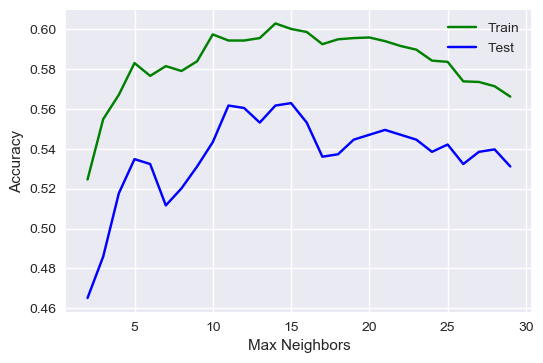

In [27]:
train_score = []
test_score = []

for neighbors in range(2, 30):
    knn = KNeighborsClassifier(n_jobs= -1, n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(2, 30), train_score, 'g', label="Train")
plt.plot(range(2, 30), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Neighbors")
plt.ylabel("Accuracy");

In [128]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)
#print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

                 precision    recall  f1-score   support

  Activist Post       0.86      0.97      0.91        64
  Alabama Today       0.99      0.92      0.95        79
Associate Press       0.00      0.00      0.00         9
      Breitbart       0.54      0.25      0.34        84
    Daily Beast       0.83      0.55      0.66        69
       Fox News       1.00      0.92      0.96        13
Global Research       0.80      0.69      0.74        35
Huffington Post       0.52      0.40      0.45        81
      Info wars       0.40      0.50      0.45       108
   Mother Jones       0.30      0.34      0.32       104
National Review       0.65      0.72      0.69        83
        Reuters       0.44      0.70      0.54        90

    avg / total       0.59      0.58      0.57       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


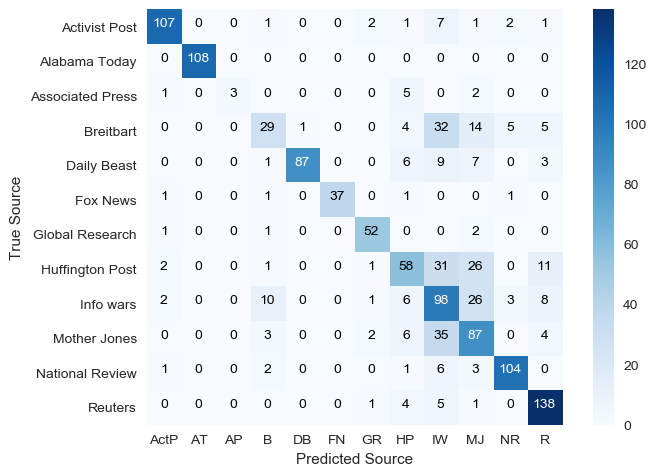

In [153]:
names = ['Activist Post', 'Alabama Today', 'Associated Press', 'Breitbart', 'Daily Beast',
       'Fox News', 'Global Research', 'Huffington Post',
       'Info wars', 'Mother Jones', 'National Review', 'Reuters']
plt.figure(dpi=100)
cm = confusion_matrix(y_test, rf2.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0,1,2,3,4,5,6, 7, 8, 9, 10, 11], ('ActP', 'AT', 'AP', 'B', 'DB',
       'FN', 'GR', 'HP',
       'IW', 'MJ', 'NR', 'R'))
plt.yticks([0,1,2,3,4,5,6, 7, 8, 9, 10, 11], ('Activist Post', 'Alabama Today', 'Associated Press', 'Breitbart', 'Daily Beast',
       'Fox News', 'Global Research', 'Huffington Post',
       'Info wars', 'Mother Jones', 'National Review', 'Reuters'));
plt.ylabel("True Source")
plt.xlabel("Predicted Source");
fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),#, fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [102]:
print(classification_report(y_test, rf2.predict(X_test)))

                 precision    recall  f1-score   support

  Activist Post       0.92      0.95      0.94        64
  Alabama Today       1.00      1.00      1.00        79
Associate Press       1.00      0.44      0.62         9
      Breitbart       0.66      0.35      0.45        84
    Daily Beast       0.93      0.72      0.81        69
       Fox News       1.00      1.00      1.00        13
Global Research       0.91      0.89      0.90        35
Huffington Post       0.61      0.47      0.53        81
      Info wars       0.47      0.72      0.57       108
   Mother Jones       0.61      0.66      0.64       104
National Review       0.90      0.89      0.90        83
        Reuters       0.80      0.90      0.85        90

    avg / total       0.76      0.74      0.74       819



In [105]:
cm

array([[13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 74,  0,  0,  1,  1,  0,  0,  0,  1,  0,  1],
       [ 0,  2, 29,  0,  0,  1,  6,  0,  0,  7,  2, 10],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  2,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 61,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  3,  0,  0,  0, 81,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 79,  0,  0,  0],
       [ 0,  0,  3,  0,  1,  0,  6,  0,  0, 38,  0, 15],
       [ 0,  0,  1,  0,  0,  0,  1,  0,  0,  5, 50,  6],
       [ 0,  1,  2,  0,  0,  1,  2,  0,  0,  3,  0, 69]])

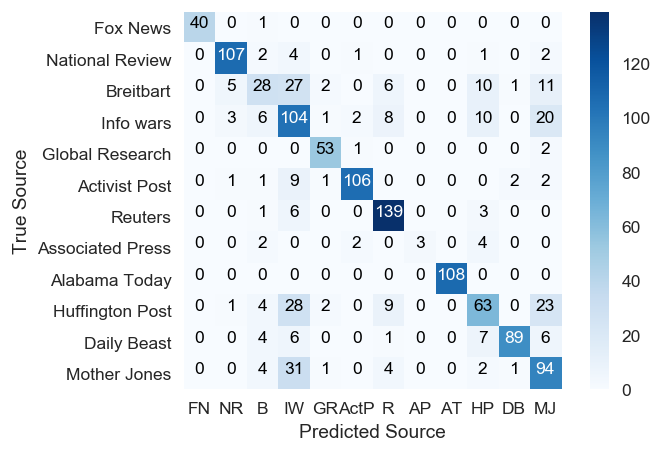

In [8]:
names = ['Fox News', 'National Review', 'Breitbart', 'Info wars', 'Global Research',
       'Activist Post', 'Reuters', 'Associate Press',
       'Alabama Today', 'Huffington Post', 'Daily Beast', 'Mother Jones']
plt.figure(dpi=125)
cm = confusion_matrix(y_test, rf2.predict(X_test), labels =names)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ('FN', 'NR', 'B', 'IW', 'GR',
       'ActP', 'R', 'AP',
       'AT', 'HP', 'DB', 'MJ'))
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ('Fox News', 'National Review', 'Breitbart', 'Info wars', 'Global Research',
       'Activist Post', 'Reuters', 'Associated Press',
       'Alabama Today', 'Huffington Post', 'Daily Beast', 'Mother Jones'));
plt.ylabel("True Source")
plt.xlabel("Predicted Source");
fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),#, fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

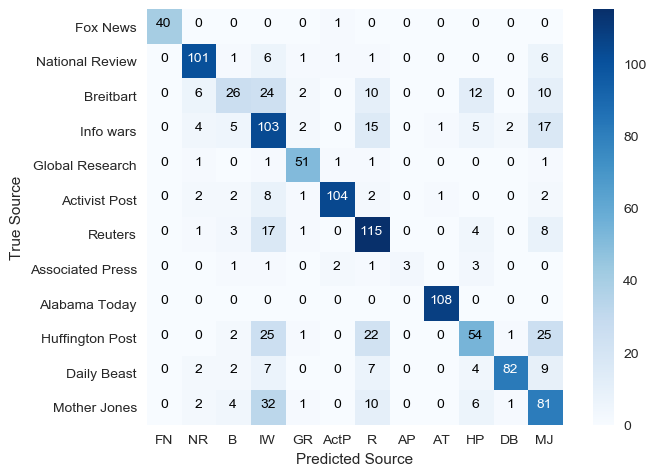

In [54]:
names = ['Fox News', 'National Review', 'Breitbart', 'Info wars', 'Global Research',
       'Activist Post', 'Reuters', 'Associate Press',
       'Alabama Today', 'Huffington Post', 'Daily Beast', 'Mother Jones']
plt.figure(dpi=100)
cm = confusion_matrix(y_test, rf2.predict(X_test), labels =names)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ('FN', 'NR', 'B', 'IW', 'GR',
       'ActP', 'R', 'AP',
       'AT', 'HP', 'DB', 'MJ'))
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ('Fox News', 'National Review', 'Breitbart', 'Info wars', 'Global Research',
       'Activist Post', 'Reuters', 'Associated Press',
       'Alabama Today', 'Huffington Post', 'Daily Beast', 'Mother Jones'));
plt.ylabel("True Source")
plt.xlabel("Predicted Source");
fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),#, fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [155]:
y_test.unique()

array(['National Review', 'Activist Post', 'Huffington Post', 'Info wars',
       'Global Research', 'Daily Beast', 'Alabama Today', 'Mother Jones',
       'Fox News', 'Reuters', 'Breitbart', 'Associate Press'],
      dtype=object)

In [75]:
km = KMeans(n_clusters=300)
clusts = km.fit_predict(corpus_lsa)

In [78]:
pipe = Pipeline(steps=[('tfidf', tfidf), ('lsa', lsa), ('Normalizer', Normalizer(copy=False)), ('km', km), ('rf2', rf2)])
pipe.steps[2]


('Normalizer', Normalizer(copy=False, norm='l2'))

NameError: name 'new' is not defined

In [112]:
rf2.predict(125)

array(['Daily Beast'], dtype=object)

In [58]:
#_ = Normalizer(copy=False).fit_transform(lsa.fit_transform(tfidf.fit_transform(how_can_this_happen)))
#pipe.fit(how_can_this_happen)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=None, min_df=1,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
 ...0, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [69]:
book = [{'body': """Benghazi, Libya – Lending credence to the theory that ISIS operates as a strategic asset of the Israeli Mossad, Libyan security forces have arrested an ISIS leader in the north-eastern Libyan city of Benghazi – who just so happens to be a Mossad agent.

The man arrested, Ephraim Benjamin, was allegedly an Israeli Mossad agent who began his operation following the 2011 toppling of the Libyan government that resulted in the murder of Libyan President Moammar Ghaddafi, according to the Israeli website Inian Merkazi, which translates to “Central Issues.”

The Mossad agent reportedly held a leading position in ISIS after mingling with Libyans during the fall of Ghaddafi. He then became a prominent imam of a large mosque in Benghazi, Libya’s second largest city, before becoming a ISIS leader who commanded a contingent of upwards of 200 terrorists.

Known in Libya as Abu Hafs, the Mossad agent was arrested and accused by Libyan authorities of gathering intelligence information for the Israeli government.

It is believed that Benjamin, aka Hafs, was a Mossad “Arabist,” which are undercover Israeli spies with Arab features, and who speak fluent Arabic in local dialects, according to the Masr Alarabia website.

The Mossad has a long history of utilizing “Arabists” to infiltrate Palestinian protests and arrest demonstrators as well as assassinating Palestinian anti-occupation activists, according to Masr Alarabia.

Libyan media outlets describe Benjamin as the “Mossad sheikh” who was arrested by local authorities.

Inian Merkazi cited the incident as evidence used by Arab media to justify the argument — popular in much of the Arab world — that Israel is complicit in the rise of ISIS in the region and uses the group as a strategic asset.

Additionally, the fact that ISIS has never so much as attempted an attack within the state of Israel bolsters that line of thinking.

ISIS is popularly believed to have begun official operations within Libya in February of 2015 by beheading 21 Egyptian Coptic Christians in the city of Sirte, but terror operations were believed to have been committed by the terrorist group prior to that date.

Seemingly confirming an Israel-ISIS connection, a 15-page report by U.N. Secretary-General Ban Ki-moon on the work of the U.N. Disengagement Observer Force revealed that the Israeli Defense Forces (IDF) maintained regular contact with the Islamic State since May of 2013.

While initial reports by the IDF claimed they provided medical care for civilians on the Israeli-Syrian border, UN observers confirmed direct contact between ISIS and IDF soldiers – which included, but was not limited to, medical care.

“Throughout the reporting period, UNDOF frequently observed armed members of the opposition interacting with the IDF across the cease-fire line,” according to the report. “On one occasion UNDOF observed the IDF on the Alpha side [inside Israel] handing over two boxes to armed opposition on the Bravo side [inside Syria].”
These activities in concert seem to indicate a coordinated and ongoing support of the Islamic State by Israel. Essentially, the Israelis are utilizing ISIS as a proxy force in an effort to topple the Assad government.

Tellingly, when the U.S. began operations against the Islamic State, the Israeli high command was reluctant to support the move and called the actions of the United States a mistake.

For those not understanding why Israel would support ISIS, it comes down to geopolitical strategy. The Israeli government perceives allies Iran and Syria as direct threats to the Jewish state, as both maintain significant regional military capabilities and political clout.

Israel’s support for ISIS would seem to confirm that they believe in the old adage, “the enemy of my enemy is my friend.”

In this particular circumstance support for the Islamic State equates to Israel eliminating geopolitical rival Syria – under Bashar al-Assad – which would then negate Iranian influence in the region.

It comes down to the simple fact that ISIS is a useful tool for Israel to impose it’s geopolitical will, without having to directly involve themselves in a hot conflict, thus seeming as if they are uninvolved in the conflict.

Once the Syrian government has been toppled, and Iranian influence on the Israeli border largely negated, Israel could then set its sights on the Islamic State – provided they were no longer of use to the Jewish state.

While states such as Israel and the United States often loudly proclaim to be against terrorism, in reality, both governments utilize terrorist groups, such as ISIS and al-Qaeda, to undermine regimes they wish to overthrow or gain influence within.

Please share this article to expose the complicity of states such as Israel and the United States in fomenting Islamic terrorism!
"""}]

In [70]:
book_df = pd.DataFrame.from_dict(book)

In [71]:
stopwords = stopwords.words()

AttributeError: 'list' object has no attribute 'words'

In [72]:
cleaned_text = clean_text(book_df.body)

0.02 %


In [73]:
let_do_this = drop_nouns(cleaned_text)

0.02


AttributeError: 'Pipeline' object has no attribute 'shape'

In [79]:
new = pipe.predict(let_do_this)

ValueError: dimension mismatch

In [118]:
num = new_clust

In [ ]:
X = new
y = true_df.source
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
num = num.reshape(-1, 1)
predict = dt.predict(num)

In [120]:
print(predict)

['Global Research']


In [121]:
os.system('say "It\'s over......Snake"')

0

In [36]:
true_df.source.unique()

array(['Reuters', 'Breitbart', 'Huffington Post', 'Info wars',
       'Mother Jones', 'National Review', 'Alabama Today',
       'Activist Post', 'Daily Beast', 'Global Research',
       'Associate Press', 'Fox News'], dtype=object)

In [122]:
print("Predictions:")
print("Video Game review of God of War: Reuters")
print("Daily Beast article: Mother Jones")
print("Fox News article: Info Wars")
print("Reuters article: Mother Jones")
print("Info Wars article: Info Wars")
print("Aljazzera article: Mother Jones")
print("New York Post article: Mother Jones")
print("Anti-News article: Global Research")

Predictions:
Video Game review of God of War: Reuters
Daily Beast article: Mother Jones
Fox News article: Info Wars
Reuters article: Mother Jones
Info Wars article: Info Wars
Aljazzera article: Mother Jones
New York Post article: Mother Jones
Anti-News article: Global Research


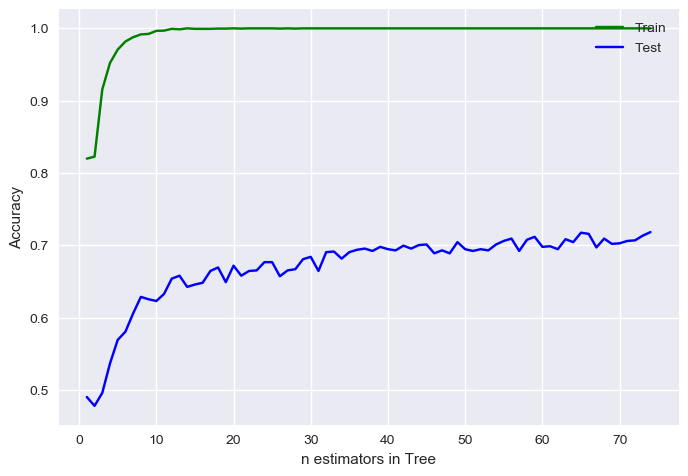

In [57]:
train_score = []
test_score = []

for depth in range(1, 75):
    rf2 = RandomForestClassifier(n_estimators=depth)
    rf2.fit(X_train, y_train)
    train_score.append(rf2.score(X_train, y_train))
    test_score.append(rf2.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(1, 75), train_score, 'g', label="Train")
plt.plot(range(1, 75), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("n estimators in Tree")
plt.ylabel("Accuracy");

In [5]:
corpus_lsa

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
true_df.to_csv()
